In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.cluster import KMeans

# Heart Attack Patients

In [2]:
patients = pd.read_csv("patients.csv")
patients.head()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
0,63,1,3,145,233,1,150,0,1
1,37,1,2,130,250,0,187,0,1
2,41,0,1,130,204,0,172,0,1
3,56,1,1,120,236,0,178,0,1
4,57,0,0,120,354,0,163,1,1


In [3]:
patients.info()
# no missing values
# all int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             303 non-null    int64
 1   gender          303 non-null    int64
 2   pain            303 non-null    int64
 3   blood_pressure  303 non-null    int64
 4   cholesterol     303 non-null    int64
 5   blood_sugar     303 non-null    int64
 6   heart_rate      303 non-null    int64
 7   exercise        303 non-null    int64
 8   outcome         303 non-null    int64
dtypes: int64(9)
memory usage: 21.4 KB


In [4]:
patients.describe()
# Checking descriptive statistics

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,149.646865,0.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,22.905161,0.469794,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000,1.000000


### 1. Scale all the variables.

In [5]:
patients_s = patients.drop(["outcome"],axis=1).apply(lambda x: preprocessing.scale(x))
patients_s

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,0.015443,-0.696631
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,1.633471,-0.696631
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,0.977514,-0.696631
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,1.239897,-0.696631
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.583939,1.435481
...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,-1.165281,1.435481
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,-0.771706,-0.696631
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,-0.378132,-0.696631
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,-1.515125,1.435481


### 2.  Determine the optimal number of clusters using the elbow method, and perform k-means clustering with the chosen value (set random state = 0).

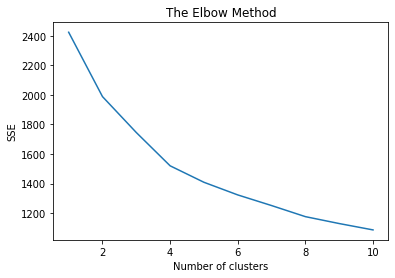

In [9]:
sse_clust=[]

for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 0)
    kmeans.fit(patients_s)
    sse_clust.append(kmeans.inertia_)
    
    
plt.plot(range(1, 11), sse_clust)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# 4 clusters seems reasonable.


In [14]:
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state = 0)
y_clust = kmeans.fit_predict(patients_s)
y_clust


array([3, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 2, 1, 0, 3, 1, 2, 2, 1, 2, 1, 1,
       1, 3, 1, 2, 3, 1, 3, 3, 1, 0, 1, 1, 0, 1, 3, 1, 2, 2, 2, 1, 0, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 3, 1,
       0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 3, 0, 3, 0, 1, 1, 2, 3, 1, 2, 2, 3,
       1, 2, 3, 0, 1, 3, 1, 0, 2, 3, 1, 3, 1, 2, 2, 3, 1, 2, 3, 0, 1, 1,
       2, 3, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2,
       1, 1, 1, 2, 3, 3, 0, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 3, 3, 1, 1, 1, 0, 0,
       3, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 3,
       0, 1, 1, 0, 0, 3, 2, 0, 0, 2, 1, 0, 1, 0, 1, 2, 3, 3, 2, 3, 0, 3,
       2, 0, 3, 3, 0, 0, 0, 0, 2, 0, 1, 3, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2,
       0, 0, 0, 1, 2, 0, 2, 2, 0, 3, 3, 0, 2, 0, 0, 0, 2, 1, 3, 1, 0, 0,
       0, 0, 2, 1, 0, 3, 1, 1, 0, 1, 0, 1, 0, 1, 3, 0, 0, 3, 3, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 3, 2, 0, 0, 0, 3, 0, 1, 3,

### 3. Identify the average of each variable in each cluster (the original, not the scaled variables).

In [15]:
patients.groupby(y_clust).mean()

# Means of original variables for the clusters
# cluster 0 clearly stands out in terms of outcome, and for example pain, 
# they seem to be patinets with no serious problem, and the reason may be exercise.

# All the patients with blood sugar issue were placed in cluster 3.

# Cluster 1 seems to include younger patients with very high heart rate.

# Cluster 2 seems to include older female patients with high cholesterol.


,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
0,56.987654,0.901235,0.222222,129.679012,245.456790,0.0,130.074074,0.864198,0.185185
1,47.642857,0.785714,1.312500,124.633929,228.973214,0.0,164.187500,0.053571,0.732143
2,60.861538,0.200000,1.138462,140.938462,275.923077,0.0,149.307692,0.107692,0.692308
3,57.000000,0.733333,1.200000,139.066667,247.911111,1.0,149.177778,0.355556,0.511111


### 4. Perform k-means clustering now with k=2. Compare the created two clusters to the ’outcome’ column. Try to determine if the created clusters separate patients who had heart attack from the other patients, or are the two clusters a mix of unhealthy (have heart attack) and healthy (no heart attack) patients.

In [16]:
kmeans_2 = KMeans(n_clusters=2, init = 'k-means++', random_state = 0)
y_clust_2 = kmeans_2.fit_predict(patients_s)
y_clust_2


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [17]:
# Compare the created two clusters to the ’outcome’ column.
pd.crosstab(patients.outcome, y_clust_2)

col_0,0,1
outcome,,
0,88,50
1,17,148


### Not surprisingly, created two clusters are a mix of not healthy (have heart attack) and healthy (no heart attack). patients

### But we still can find some reasonable separation when using 2 clusters, although not perfect.
### Most of outcome 1, (i.e. heart attack patients) are in the cluster 1, if we would
### use it to sort out patients, we would only miss 17 of them.